In [109]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import hvplot.pandas

**Elbow method** - optimal number of clusters for a dataset<br><br>

**K-means algo** - identifies clusters in a dataset<br><br> Quite good for clustering customers (segmenting) for marketing and financials benefits<br><br> Formula: minimize [x - mu]2    /// Minimising distance between the datapoint and the cluster's mean

<br>

Other Uses...:
<br><br>
*ML in Banking*: For mortgages, we can use it to classify 1 or 0 , 1 being that we will give the loan, and 0 will be that you cannot give the loan... E.g. Given variables a....z about a customer, predict whether they will default on a loan of $x amount

**Clustering uses:** You purchase a torch from a website, by using clustering, they may next advertise 'tents' or camping related stuff for you.... "Camping" in this case would be the cluster

In [110]:
#X is your array of random number data (100 by 2), and y is your cluster classification

X, y = make_blobs(
    centers = 3, # How many clusters
    random_state= 1 # Will generate simialr types of random numbers
)

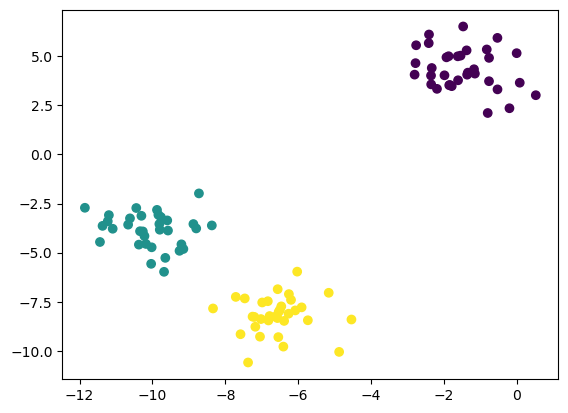

In [111]:
plt.scatter(X[:,0], X[:,1], c=y) 

In [112]:
X, y = make_blobs(
    centers = 5, # How many clusters
    random_state= 1 # Will generate simialr types of random numbers
)

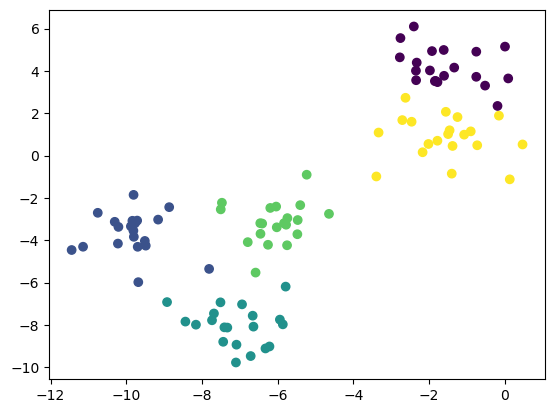

In [113]:
plt.scatter(X[:,0], X[:,1], c=y) 

## K-means

You first randomly select K-clusters, each object is assignmed a random centroid. <br><br> The new mean for the cluster is determined based on the mean of all the data points assigned to that cluster

In [114]:
data = pd.read_csv('service_ratings.csv')
data.head()

,mobile_app_rating,personal_banker_rating
0,3.50,2.40
1,3.65,3.14
2,2.90,2.75
3,2.93,3.36
4,2.89,2.62


In [115]:
model = KMeans(n_clusters=4, random_state = 1)
model

KMeans(n_clusters=4, random_state=1)

In [116]:
model.fit(data)

KMeans(n_clusters=4, random_state=1)

In [117]:
y_pred = model.predict(data)

print(y_pred) # will give you 0,1,2 classification stuff

[3 1 0 0 0 0 0 1 0 2 0 0 1 0 3 1 0 1 0 0 1 1 0 1 0 3 2 1 2 3 1 0 1 3 1 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 3 0 0 0 1 0 0 0 0 3 3 0 0 3 2 0 1
 2 1 3 0 1 1 1 3 2 1 1 0 2 1 3 2 1 0 0 1 3 1 3 1 0 0 3 0 1 0 1 1 2 2 1 1 0
 0 1 1 3 1 2 2 0 1 3 0 0 0 0 0 0 1 0 0 0 1 1 1 0 3 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 2 0 3 1 1 1 3 1 1 1 0 1 3 0 1 0 0 0 2 3 1 0 3 0 0 2 1 3 1 0 0 3 1]


In [118]:
#copy dataframe
x1 = data.copy()

#add column to df with information (new)
x1['predicted'] = y_pred


x1.head()

,mobile_app_rating,personal_banker_rating,predicted
0,3.50,2.40,3
1,3.65,3.14,1
2,2.90,2.75,0
3,2.93,3.36,0
4,2.89,2.62,0


In [119]:
plot = x1.hvplot.scatter(
    x='mobile_app_rating',
    y='personal_banker_rating',
    by = 'predicted' # The predicted clusters
)

plot


:NdOverlay   [predicted]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

## Inertia: important concept - essentially concentrated of the elements in dataset <br>

##### Definition: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided

An optimiation problem: The Elbow Method, finding optimal value for k. Plot number of clusters versus an objective function called inertia (Minimize the sum of squared distances)<br> !!<br> ** However, you dont want too many clusters, so you have a trade-off of an intertia level** 

In [120]:
inertia = []
k = list(range(1,11))

In [121]:
for i in k:
    k_model = KMeans(n_clusters=i,random_state=1)
    k_model.fit(data)
    inertia.append(k_model.inertia_) # attribute

In [122]:
inertia # 1 cluster, 2 cluster, 3 cluster, 4 clsuter etc....

[122.47219562841529,
 77.08018976358149,
 58.44346962233168,
 42.595217711180936,
 34.6246996849727,
 29.01130775176884,
 23.807186171310626,
 20.142483286644026,
 18.201664340554082,
 16.380305644645208]

In [123]:
elbow_data = {"k":k, "inertia": inertia}
df_elbow = pd.DataFrame(data = elbow_data)


df_elbow.head()

,k,inertia
0,1,122.472196
1,2,77.080190
2,3,58.443470
3,4,42.595218
4,5,34.624700


In [124]:
df_elbow.hvplot.line(
    y = 'inertia',
    x = 'k'
)

:Curve   [k]   (inertia)

In [125]:
model = KMeans(n_clusters=4, random_state=1)
model.fit(data)

k_4 = model.predict(data)
k_4

array([3, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 3, 2, 1, 2, 3, 1, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 2, 0, 1, 2, 1, 3, 0, 1, 1, 1, 3, 2, 1, 1, 0, 2, 1,
       3, 2, 1, 0, 0, 1, 3, 1, 3, 1, 0, 0, 3, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 1, 3, 1, 2, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 3, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 3, 1,
       1, 1, 3, 1, 1, 1, 0, 1, 3, 0, 1, 0, 0, 0, 2, 3, 1, 0, 3, 0, 0, 2,
       1, 3, 1, 0, 0, 3, 1], dtype=int32)

In [126]:
x2 = data.copy()
x2['pred'] = k_4

In [127]:
x2.hvplot.scatter(
    x = 'mobile_app_rating',
    y = 'personal_banker_rating',
    by = 'pred'
)

:NdOverlay   [pred]
   :Scatter   [mobile_app_rating]   (personal_banker_rating)

# Standardaizing data #1


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
lal = pd.read_csv('shopping_data.csv')
lal

,CustomerID,Card Type,Age,Annual Income,Spending Score
0,1,Credit,19,15000,39
1,2,Credit,21,15000,81
2,3,Debit,20,16000,6
3,4,Debit,23,16000,77
4,5,Debit,31,17000,40
...,...,...,...,...,...
195,196,Debit,35,120000,79
196,197,Debit,45,126000,28
197,198,Credit,32,126000,74
198,199,Credit,32,137000,18


In [130]:
xy = StandardScaler().fit_transform(lal[['Annual Income','Spending Score', 'Age']])
xy

xy1 = pd.DataFrame(xy, columns = ['Income', 'Spending Score', 'Age'])
xy1

,Income,Spending Score,Age
0,-1.738999,-0.434801,-1.424569
1,-1.738999,1.195704,-1.281035
2,-1.700830,-1.715913,-1.352802
3,-1.700830,1.040418,-1.137502
4,-1.662660,-0.395980,-0.563369
...,...,...,...
195,2.268791,1.118061,-0.276302
196,2.497807,-0.861839,0.441365
197,2.497807,0.923953,-0.491602
198,2.917671,-1.250054,-0.491602


In [131]:
cards = pd.get_dummies(lal['Card Type'])
cards.head()


,Credit,Debit
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [132]:
total = pd.concat([xy1, cards], axis = 1)
total

,Income,Spending Score,Age,Credit,Debit
0,-1.738999,-0.434801,-1.424569,1,0
1,-1.738999,1.195704,-1.281035,1,0
2,-1.700830,-1.715913,-1.352802,0,1
3,-1.700830,1.040418,-1.137502,0,1
4,-1.662660,-0.395980,-0.563369,0,1
...,...,...,...,...,...
195,2.268791,1.118061,-0.276302,0,1
196,2.497807,-0.861839,0.441365,0,1
197,2.497807,0.923953,-0.491602,1,0
198,2.917671,-1.250054,-0.491602,1,0


## Standardazing Data #2

####        .applymap applies to whole dataframe.    .apply only to specified element

In [133]:
tsx = pd.read_csv('tsx-energy-2018.csv', index_col='Ticker')
tsx

,CompanyName,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType
Ticker,,,,,,,,,
ARX,ARC Resources Ltd.,13.14,13.34,12.91,13.10,1479913.38,-0.7275,0.3590,Oil
CCO,Cameco Corporation,13.70,13.92,13.50,13.70,1203788.22,0.2014,0.3693,Other Energy
CNQ,Canadian Natural Resources Limited,41.97,42.46,41.46,41.91,3218248.68,-0.3461,0.2947,Oil
CVE,Cenovus Energy Inc.,11.96,12.18,11.75,11.95,4566143.56,-0.3219,0.4500,Oil
CPG,Crescent Point Energy Corp.,8.53,8.67,8.36,8.50,3919414.03,-1.0103,0.4597,Other Energy
ENB,Enbridge Inc.,43.43,43.79,42.90,43.32,3764995.23,-0.1993,0.2339,Other Energy
ERF,Enerplus Corporation,14.66,14.90,14.43,14.64,1113371.53,-0.2554,0.3666,Oil
GEI,Gibson Energy Inc.,18.53,18.73,18.33,18.54,356758.55,-0.0273,0.2531,Other Energy
HSE,Husky Energy Inc.,18.89,19.14,18.64,18.87,1322354.12,-0.2899,0.3115,Other Energy


In [134]:
def encode_energytype(energytype):
    if energytype == 'Oil':
        return 1
    else:
        return 0
    
#Call the encode_energytype function on the energytype column
tsx['EnergyType'] = tsx['EnergyType'].apply(encode_energytype) # Diff way of using a function ##  apply.(lambda x: 1 if x == 'Oil' else 0)

In [135]:
tsx2 = StandardScaler().fit_transform(tsx[['MeanOpen','MeanHigh', 'MeanLow', 'MeanClose', 'MeanVolume', 'AnnualReturn', 'AnnualVariance']])

tsx3 = pd.DataFrame(tsx2, columns = ['MeanOpen','MeanHigh', 'MeanLow', 'MeanClose', 'MeanVolume', 'AnnualReturn', 'AnnualVariance'], index = tsx.index)
tsx3.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance
Ticker,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424


In [136]:
tsx3['EnergyType'] = tsx['EnergyType']
tsx3.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType
Ticker,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0


In [137]:
inertia3 = []
k = list(range(1,11))

for i in k:
    k_model = KMeans(n_clusters=i,random_state=1)
    k_model.fit(tsx3)
    inertia3.append(k_model.inertia_) # attribute

In [138]:
inertia

[122.47219562841529,
 77.08018976358149,
 58.44346962233168,
 42.595217711180936,
 34.6246996849727,
 29.01130775176884,
 23.807186171310626,
 20.142483286644026,
 18.201664340554082,
 16.380305644645208]

In [139]:
elbow_data1 = {"k":k, "inertia": inertia3}
df_elbow1 = pd.DataFrame(data = elbow_data1)


df_elbow1.head()

,k,inertia
0,1,173.958333
1,2,81.849956
2,3,60.328847
3,4,48.052693
4,5,39.627382


In [140]:
df_elbow1.hvplot.line(
    y = 'inertia',
    x = 'k'
)

:Curve   [k]   (inertia)

In [141]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(tsx3)

k_3 = model.predict(tsx3)
k_3

x90 = tsx3.copy()
x90['pred'] = k_3
x90.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType,pred
Ticker,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,1
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,2
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,1
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1


### Silllhoute Clustering/Index? 

In [142]:
from sklearn import metrics

In [144]:
#labels = birch_model.labels_
#score = metrics.calinski_harabasz_score(X, labels)
#score

In [146]:
# labels_k = k_model10.labels_
# score1 = metrics.calinski_harabasz_score(X, labels_k)
# score1

# Next Sessions warm up:

In [163]:
wu = pd.read_csv('global_carry_trades.csv')
wu

,interest_differential,next_month_currency_return,IMF Country Code
0,0.001414,-0.061174,GBR
1,-0.000570,-0.058120,BEL
2,0.001478,-0.056031,DNK
3,0.000655,-0.056991,FRA
4,-0.002928,-0.067056,DEU
...,...,...,...
994,0.002599,-0.026135,NLD
995,0.002077,-0.022155,NOR
996,-0.004502,-0.002585,SWE
997,0.001282,-0.036534,CHE


In [159]:
standard = StandardScaler().fit_transform(wu[['interest_differential', 'next_month_currency_return']])
standard

array([[-0.24270991, -1.93608838],
       [-0.8539933 , -1.84109498],
       [-0.22308154, -1.77613322],
       ...,
       [-2.06571363, -0.11369318],
       [-0.28323   , -1.16968902],
       [-0.35185225,  0.28467327]])

In [164]:
rate_df_scaled = pd.DataFrame(data = standard, columns = ['interest_differential', 'next_month_currency_return'])
rate_df_scaled

,interest_differential,next_month_currency_return
0,-0.242710,-1.936088
1,-0.853993,-1.841095
2,-0.223082,-1.776133
3,-0.476617,-1.805994
4,-1.580459,-2.119073
...,...,...
994,0.122649,-0.846237
995,-0.038476,-0.722418
996,-2.065714,-0.113693
997,-0.283230,-1.169689


In [166]:
dummies = pd.get_dummies(wu['IMF Country Code'])
dummies.head()

,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
rate_df_scaled = pd.concat([rate_df_scaled, dummies], axis=1)
rate_df_scaled

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.122649,-0.846237,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
995,-0.038476,-0.722418,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
996,-2.065714,-0.113693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,-0.283230,-1.169689,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## MODEL FUNCTION:

In [191]:
def fit_KMeans(n_clusters, random_state, df):

    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(df)

    k_3 = model.predict(df)
    
    return k_3


In [187]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(rate_df_scaled)

k_3 = model.predict(rate_df_scaled)
k_3

x90 = rate_df_scaled.copy()
x90['Country Cluster'] = k_3
x90.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,Country Cluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [189]:
final = x90.groupby('Country Cluster')['next_month_currency_return'].mean()
final

Country Cluster
0   -0.242211
1    0.628660
2   -1.134452
Name: next_month_currency_return, dtype: float64

In [186]:
x90.hvplot.scatter(
    x = 'interest_differential',
    y = 'next_month_currency_return',
    by = 'pred'
)

:NdOverlay   [pred]
   :Scatter   [interest_differential]   (next_month_currency_return)